In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("Tiroid.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) 


In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    ob

# Visu

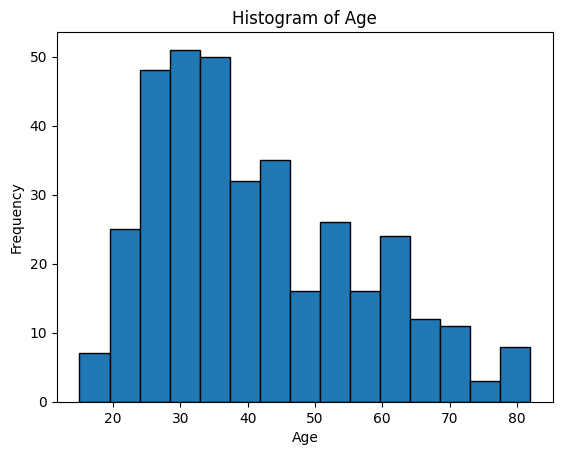

In [8]:
plt.hist(df["Age"],bins=15,edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

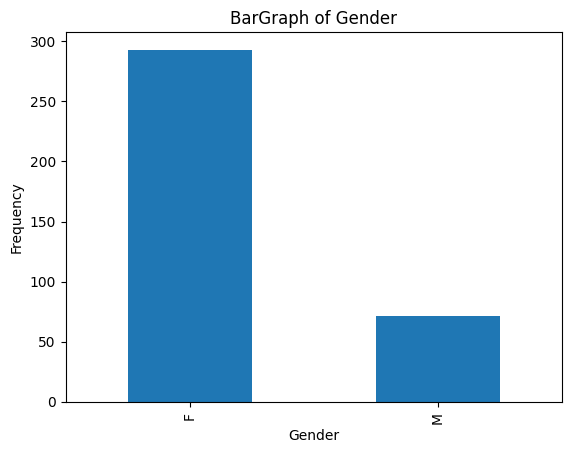

In [9]:
count_gen=df["Gender"].value_counts()
ax=count_gen.plot(kind='bar')
ax.set_ylabel("Frequency")
ax.set_title("BarGraph of Gender")
plt.show()

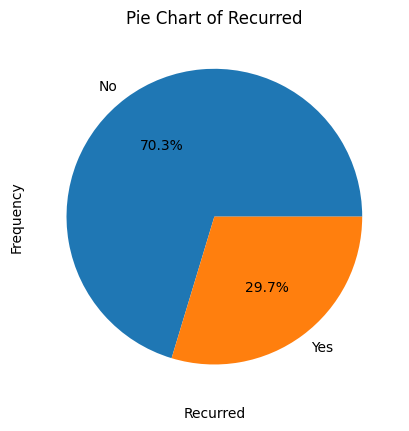

In [10]:

count_gen = df["Recurred"].value_counts()
ax = count_gen.plot(kind='pie', autopct='%1.1f%%')
ax.set_ylabel("Frequency")
ax.set_title("Pie Chart of Recurred")
plt.xlabel("Recurred")
plt.show()


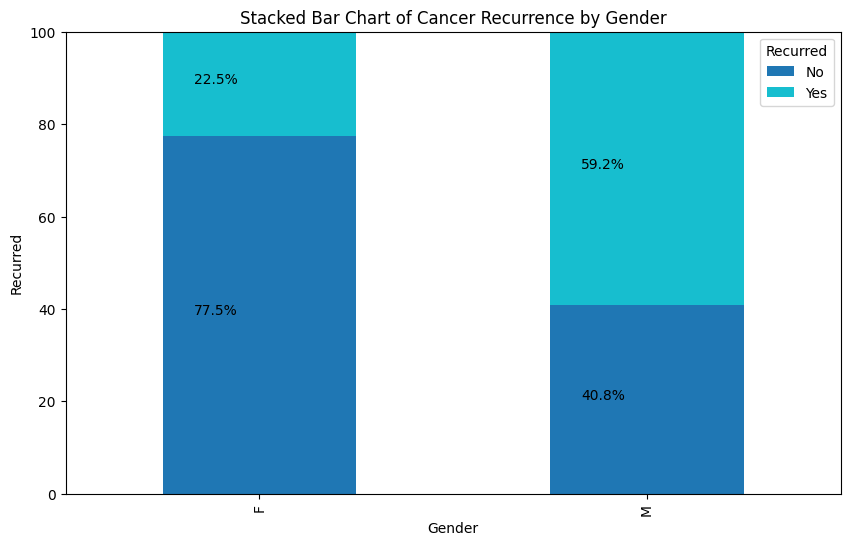

In [11]:
cross_tab=pd.crosstab(index=df["Gender"],columns=df["Recurred"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)*100

cross_tab_norm.plot(kind="bar",stacked=True,colormap='tab10',figsize=(10,6))

plt.xlabel("Gender")
plt.ylabel("Recurred")
plt.title("Stacked Bar Chart of Cancer Recurrence by Gender")
for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x],
                                   cross_tab_norm.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10)
plt.ylim(0,100)
plt.show()

### cheack whether there are any association between smorking and reccured cancer

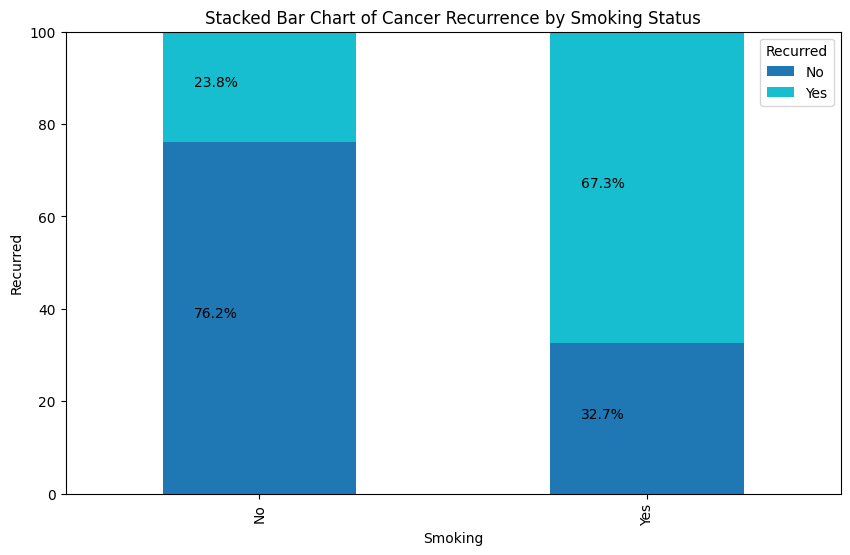

In [12]:
cross_tab=pd.crosstab(index=df["Smoking"],columns=df["Recurred"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)*100

cross_tab_norm.plot(kind="bar",stacked=True,colormap='tab10',figsize=(10,6))

plt.xlabel("Smoking")
plt.ylabel("Recurred")
plt.title("Stacked Bar Chart of Cancer Recurrence by Smoking Status")

for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x],
                                   cross_tab_norm.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion , 1)}%', 
                 color="black",
                 fontsize=10)
plt.ylim(0, 100)
plt.show()

#### Chisqure test

In [13]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['Smoking_n']=df["Smoking"].astype("category").cat.codes
df['Recurre_n']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['Smoking'], df['Recurred'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

#drop created columns
df.drop(columns=['Smoking_n',"Recurre_n"],inplace=True)

Chi-Square Statistic: 36.46035236625514
p-value: 1.558034128003967e-09
Degrees of Freedom: 1
Expected Frequencies:
 [[221.53846154  93.46153846]
 [ 34.46153846  14.53846154]]


In [14]:
##Smoking status vs gender

<Axes: xlabel='Gender', ylabel='Smoking'>

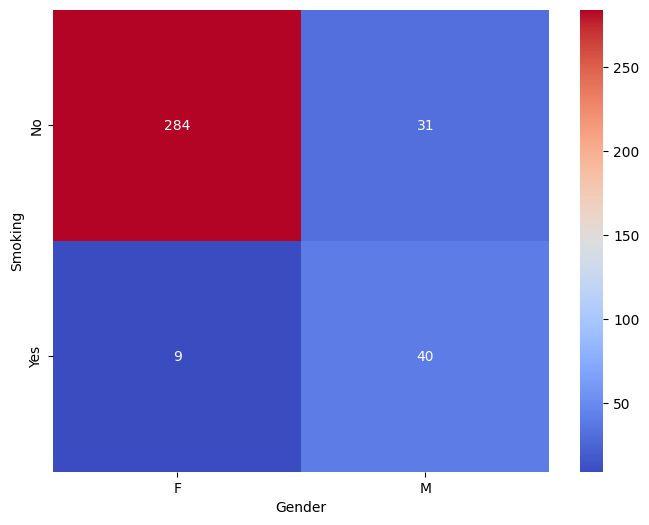

In [15]:
crostab=pd.crosstab(df["Smoking"],df["Gender"])
plt.figure(figsize=(8, 6))
sns.heatmap(crostab, annot=True, cmap="coolwarm", fmt="d")

In [16]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### check whather how to canser react the treatment(response) According to the paitent age

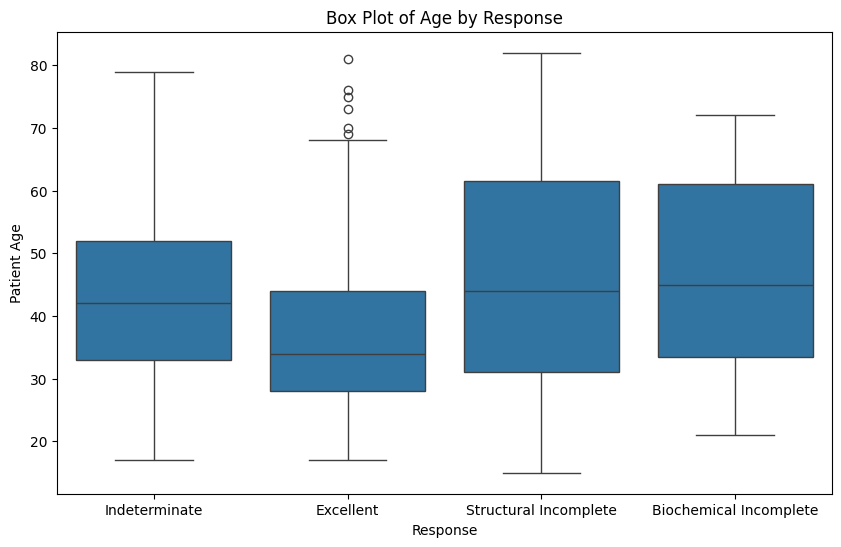

In [17]:
plt.figure(figsize=(10,6)) # the first figure

sns.boxplot(x=df["Response"], y=df["Age"])
plt.xlabel("Response")
plt.ylabel("Patient Age")
#plt.xticks(rotation=45, ha='right')
plt.title("Box Plot of Age by Response")
plt.show()


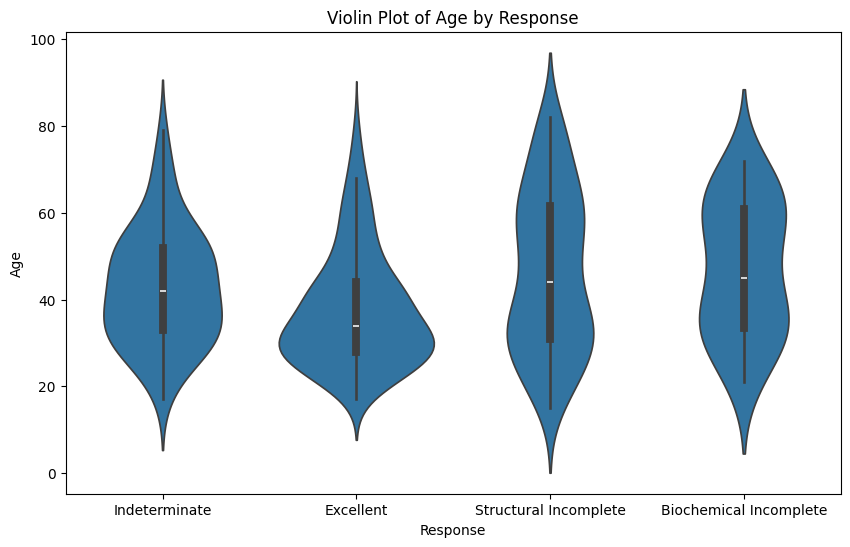

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Response'], y=df["Age"])
plt.title('Violin Plot of Age by Response')
plt.show()

In [19]:
from scipy.stats import kruskal
df["Response"].value_counts()

Response
Excellent                 189
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [20]:
df['Responsess']=df["Response"].astype("category").cat.codes
df.tail(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Responsess
354,31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes,3
355,62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes,3
356,59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes,3
357,40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes,3
358,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes,3
359,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,0
360,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,3
361,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,3
362,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,3
363,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,3


In [21]:
# Extract values for each group
group_A = df[df['Responsess'] == 1]['Age']
group_B = df[df['Responsess'] == 3]['Age']
group_C = df[df['Responsess'] == 2]['Age']
group_D = df[df["Responsess"] == 0]["Age"]


In [22]:
stat,p_value = kruskal(group_A,group_B,group_C,group_D)
print("Kruskal wallis value(H value):",stat)
print("P value:",p_value)


Kruskal wallis value(H value): 21.263614940863462
P value: 9.280468429638353e-05


In [23]:

#H0 : There is no difference in location between the populations from which the 4 samples have been drawn.

#H1: There is a difference in location in one or more populations

c_value=7.815

if stat >= c_value:
    print("we reject H0")
else:
    print("we do not reject H0")
    

we reject H0


In [24]:
#remove the created variable
df.drop(columns="Responsess",inplace=True)

### check whether there is any association between cancer stage and responce

<Figure size 10000x600 with 0 Axes>

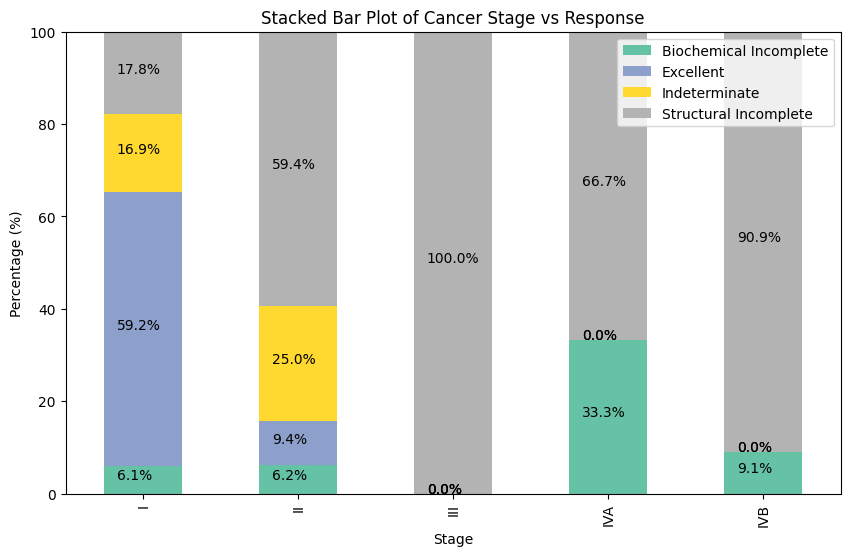

In [25]:
cross_tab = pd.crosstab(index=df["Stage"], columns=df["Response"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100  # Scale to percentages

# Plot stacked bar chart with custom colors
plt.figure(figsize=(100, 6))
cross_tab_norm.plot(kind="bar", stacked=True, colormap='Set2', figsize=(10, 6))

plt.xlabel("Stage")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x], cross_tab_norm.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Cancer Stage vs Response')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.show()

In [26]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['Stage_s']=df["Stage"].astype("category").cat.codes
df['Response_s']=df["Response"].astype("category").cat.codes

contingency_table = pd.crosstab(df['Stage_s'], df['Response_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['Stage_s','Response_s'],inplace=True)

Chi-Square Statistic: 83.71160683196993
p-value: 8.046302591992016e-13
Degrees of Freedom: 12
Expected Frequencies:
 [[ 19.84065934 163.03846154  52.62087912  78.5       ]
 [  2.02197802  16.61538462   5.36263736   8.        ]
 [  0.25274725   2.07692308   0.67032967   1.        ]
 [  0.18956044   1.55769231   0.50274725   0.75      ]
 [  0.69505495   5.71153846   1.84340659   2.75      ]]


### check whether canser recuured vs  Focality have a replationship

<Figure size 10000x600 with 0 Axes>

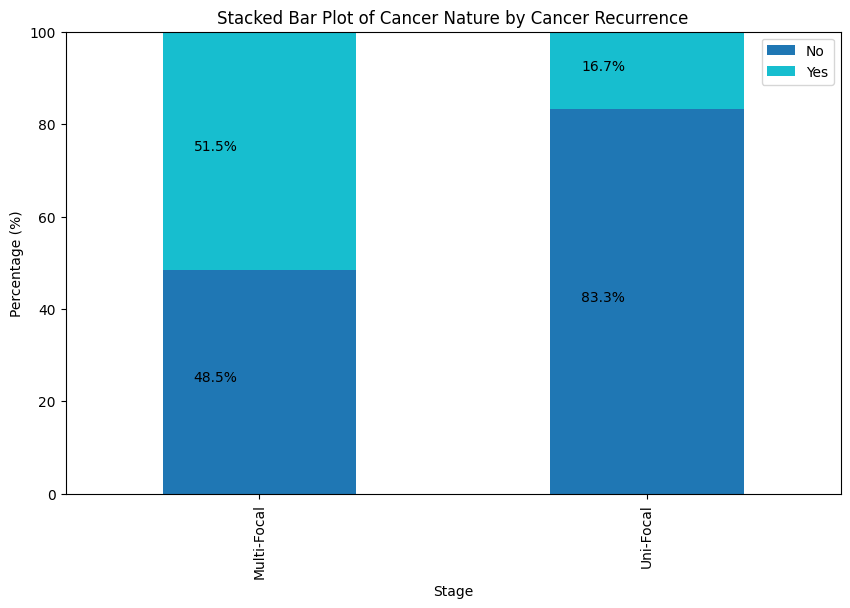

In [27]:
cross=pd.crosstab(index=df["Focality"],columns=df['Recurred'])
croostab_pre=cross.div(cross.sum(axis=1), axis=0) * 100

plt.figure(figsize=(100, 6))
croostab_pre.plot(kind="bar", stacked=True, colormap='tab10', figsize=(10, 6))

plt.xlabel("Stage")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*croostab_pre.index.values]):
    for (proportion, y_loc) in zip(croostab_pre.loc[x], croostab_pre.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Cancer Nature by Cancer Recurrence')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.show()

In [28]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['fotal_s']=df["Focality"].astype("category").cat.codes
df['re_s']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['fotal_s'], df['re_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['fotal_s','re_s'],inplace=True)

Chi-Square Statistic: 47.79634368176791
p-value: 4.728730989321359e-12
Degrees of Freedom: 1
Expected Frequencies:
 [[ 95.64835165  40.35164835]
 [160.35164835  67.64835165]]


### thyroid fuction vs recurred

<Figure size 10000x600 with 0 Axes>

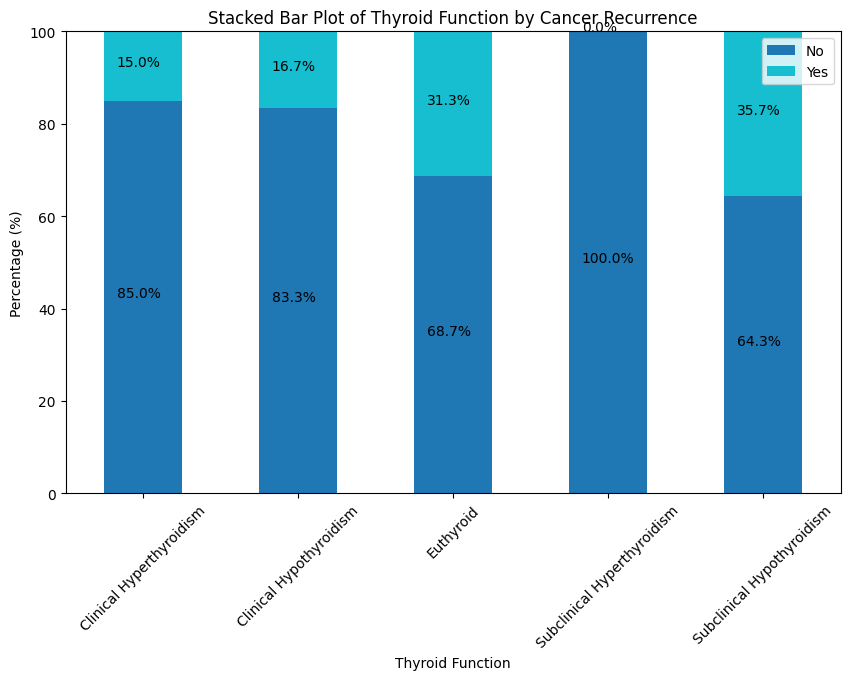

In [29]:
cross=pd.crosstab(index=df["Thyroid Function"],columns=df['Recurred'])
croostab_pre=cross.div(cross.sum(axis=1), axis=0) * 100

plt.figure(figsize=(100, 6))
croostab_pre.plot(kind="bar", stacked=True, colormap='tab10', figsize=(10, 6))

plt.xlabel("Thyroid Function")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*croostab_pre.index.values]):
    for (proportion, y_loc) in zip(croostab_pre.loc[x], croostab_pre.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Thyroid Function by Cancer Recurrence')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.xticks(rotation=45)
plt.show()

In [30]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['thyfu_s']=df["Thyroid Function"].astype("category").cat.codes
df['re_s']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['thyfu_s'], df['re_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['thyfu_s','re_s'],inplace=True)

Chi-Square Statistic: 5.792854919782669
p-value: 0.2151612864624312
Degrees of Freedom: 4
Expected Frequencies:
 [[ 14.06593407   5.93406593]
 [  8.43956044   3.56043956]
 [220.13186813  92.86813187]
 [  3.51648352   1.48351648]
 [  9.84615385   4.15384615]]


### Encode the data set


In [31]:
##### one hot encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_df=df[['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy',
             'Pathology','Focality','T',"Risk",'N','M','Stage','Response']]

encoder=OneHotEncoder()
# Fit and transform the categorical DataFrame
encode_df = encoder.fit_transform(cat_df)

# Generate new column names
new_column_names = encoder.get_feature_names_out(cat_df.columns)

# Create the new DataFrame with the encoded data
encoded_df = pd.DataFrame(encode_df.toarray(), columns=new_column_names)
encoded_df.head()
#df2=df.drop(['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy',
             #'Pathology','Focality','Risk','T','N','M','Stage','Response'],axis=1)
df=pd.concat([encoded_df,df],axis=1)
#df.to_csv("out.csv",index=True)
catcols=cat_df.columns
df.drop(columns=catcols,inplace=True)

In [32]:
df3=df


In [33]:
# for col in df3.select_dtypes(include=['float']):
#     df3[col] = df3[col].astype('int64')

In [34]:
scaler = StandardScaler()
df3[["Age"]]= scaler.fit_transform(df3[["Age"]])


In [35]:

#convert the responce varible to numeric
df3["Recurred"]=df["Recurred"].map({'Yes':1, 'No':0})
df3.tail()

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
359,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.010683,1
360,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.599176,1
361,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.010683,1
362,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.291414,1
363,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.683743,1


In [36]:
### Split the data set

In [37]:
from sklearn.model_selection import train_test_split
X=df3.drop('Recurred',axis=1)
y=df3["Recurred"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Imbalanced Datasets and Applying SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [39]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Recurred
0    174
1     80
Name: count, dtype: int64
After SMOTE: Recurred
1    174
0    174
Name: count, dtype: int64


# Model's Fitting

### Logistic Regresion Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logitmodel=LogisticRegression(max_iter=500)


In [41]:
logitmodel.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=500)

In [42]:
y_pred=logitmodel.predict(X_test)
print(y_pred)


[0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [43]:
y_train_pred=logitmodel.predict(X_train)
print("Acurracy for training set:")
accuracy_score(y_train,y_train_pred)

Acurracy for training set:


0.9645669291338582

In [44]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing set accuracy:", test_accuracy)

Testing set accuracy: 0.9636363636363636


In [45]:
from sklearn.metrics import classification_report
Cl=classification_report(y_test, y_pred)
print("clasification report:")
print(Cl)


clasification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        82
           1       0.90      0.96      0.93        28

    accuracy                           0.96       110
   macro avg       0.94      0.96      0.95       110
weighted avg       0.97      0.96      0.96       110



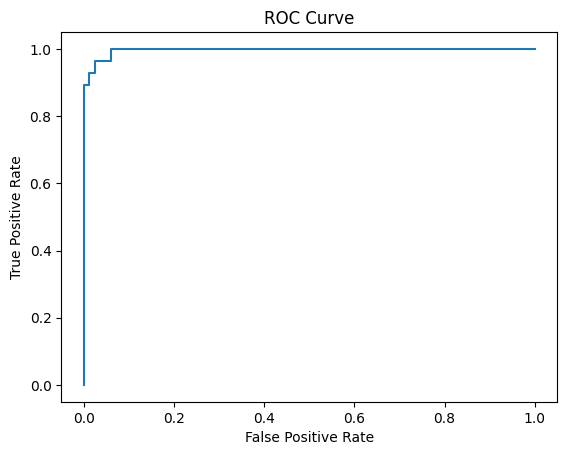

0.9965156794425086

In [90]:
y_pred_prpl=logitmodel.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpl[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc = roc_auc_score(y_test, y_pred_prpl[:,1])
auc

###  SVC

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score
suppvm=SVC(probability=True)

#model fitting
suppvm.fit(X_train_sm,y_train_sm)



SVC(probability=True)

In [77]:
#predict
y_pred_svc=suppvm.predict(X_test)
print(y_pred_svc)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [78]:
from sklearn.metrics import classification_report
svc_cl=classification_report(y_test,y_pred_svc)
print("clasification report:")
print(svc_cl)

clasification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.96      0.93      0.95        28

    accuracy                           0.97       110
   macro avg       0.97      0.96      0.96       110
weighted avg       0.97      0.97      0.97       110



In [79]:
from sklearn.metrics import accuracy_score
svc_ac=accuracy_score(y_test,y_pred_svc)
print(svc_ac)

0.9727272727272728


In [80]:
y_train_preds=suppvm.predict(X_train)
print("Acurracy for training set svm:")
accuracy_score(y_train,y_train_preds)

Acurracy for training set svm:


0.984251968503937

#### ROC curve and AUC value

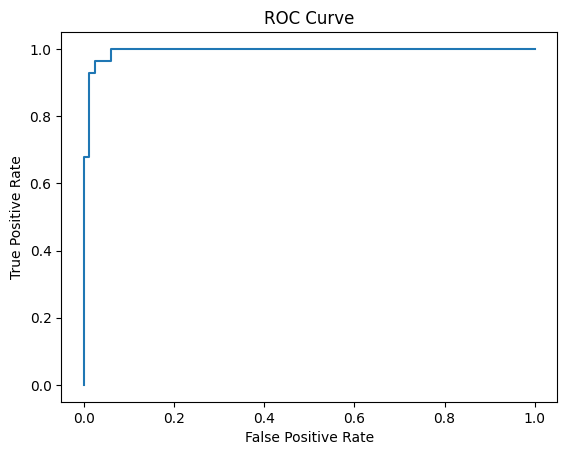

In [81]:
y_pred_prpb=suppvm.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpb[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [82]:
auc = roc_auc_score(y_test, y_pred_prpb[:,1])
auc

0.9939024390243902

### random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=100, random_state=100)

In [56]:
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=100)

In [57]:
y_pred_rf=rf.predict(X_test)
print(y_pred_rf)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [58]:
cl_rf=classification_report(y_test,y_pred_rf)
print("clasification report:")
print(cl_rf)

clasification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        82
           1       0.93      0.93      0.93        28

    accuracy                           0.96       110
   macro avg       0.95      0.95      0.95       110
weighted avg       0.96      0.96      0.96       110



In [59]:
accuracy_score(y_test,y_pred_rf)

0.9636363636363636

In [60]:
y_train_predr=rf.predict(X_train)
print("Acurracy for training set random:")
accuracy_score(y_train,y_train_predr)

Acurracy for training set random:


1.0

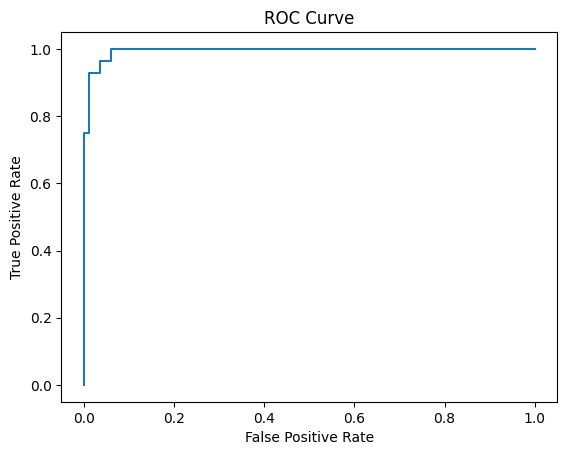

In [84]:
y_pred_prpbf=rf.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpbf[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [86]:
auc = roc_auc_score(y_test, y_pred_prpbf[:,1])
auc

0.9943379790940766

###  KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [62]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [63]:
y_pred_knn=knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9090909090909091

In [64]:
cl_knn=classification_report(y_test,y_pred_knn)
print(cl_knn)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        82
           1       0.78      0.89      0.83        28

    accuracy                           0.91       110
   macro avg       0.87      0.90      0.89       110
weighted avg       0.92      0.91      0.91       110



#### after hyper parameter tuning KNN 

In [65]:
params = {
 'n_neighbors': list(range(1, 20)),
 'weights': ['uniform', 'distance'],
 'p': [1,2]
}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, n_jobs=5, verbose=1)
grid_search.fit(X_train_sm,y_train_sm)
y_pred_knng=grid_search.predict(X_test)
accuracy_score(y_test,y_pred_knng)
print(classification_report(y_test,y_pred_knng))

Fitting 5 folds for each of 76 candidates, totalling 380 fits
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        82
           1       0.85      0.82      0.84        28

    accuracy                           0.92       110
   macro avg       0.90      0.89      0.89       110
weighted avg       0.92      0.92      0.92       110



In [66]:
print(grid_search.best_params_)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [67]:
y_train_predknn=grid_search.predict(X_train)
print("Acurracy for training set knn:")
accuracy_score(y_train,y_train_predknn)

Acurracy for training set knn:


1.0

In [68]:
accuracy_score(y_test,y_pred_knng)

0.9181818181818182

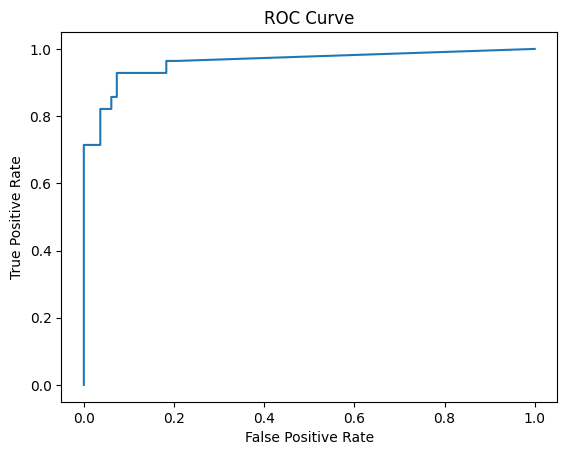

0.9605836236933799

In [89]:
y_pred_prpbfn=grid_search.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpbfn[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc = roc_auc_score(y_test, y_pred_prpbfn[:,1])
auc